# matplotlib, pandas, seaborn을 이용한 시각화

- 소개
 - matplotlib : 상상할 수 있는 대부분을 그릴 수 있음.
 - pandas : 일반적으로 plot 메서드를 호출해서 원하는 것을 도식화 가능.
 - seaborn : matplotlib을 래핑하고 자체로는 도식화를 수행하지 않는 시각화 라이브러리.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplolib inline

UsageError: Line magic function `%matplolib` not found.


## matplotlib
 - Figure : container
    - Axes : 상호 작용할 주요 객체이자 도면(x축, y축, 점, 선, 마커, 레이블, 범례, 등)
     - Axis : 도면의 축

### matplotlib의 객체 지향 가이드
- 상태 저장 인터페이스는 pyplot 모듈을 사용하여 호출
- 특정 도식화 객체를 참조하는 변수를 명시적으로 사용하는 상태 비저장 또는 객체지향 인터페이스를 제공.
- pyplot의 subplot 함수를 사용. Figure과 Axes를 만들고 해당 객체에 사용.

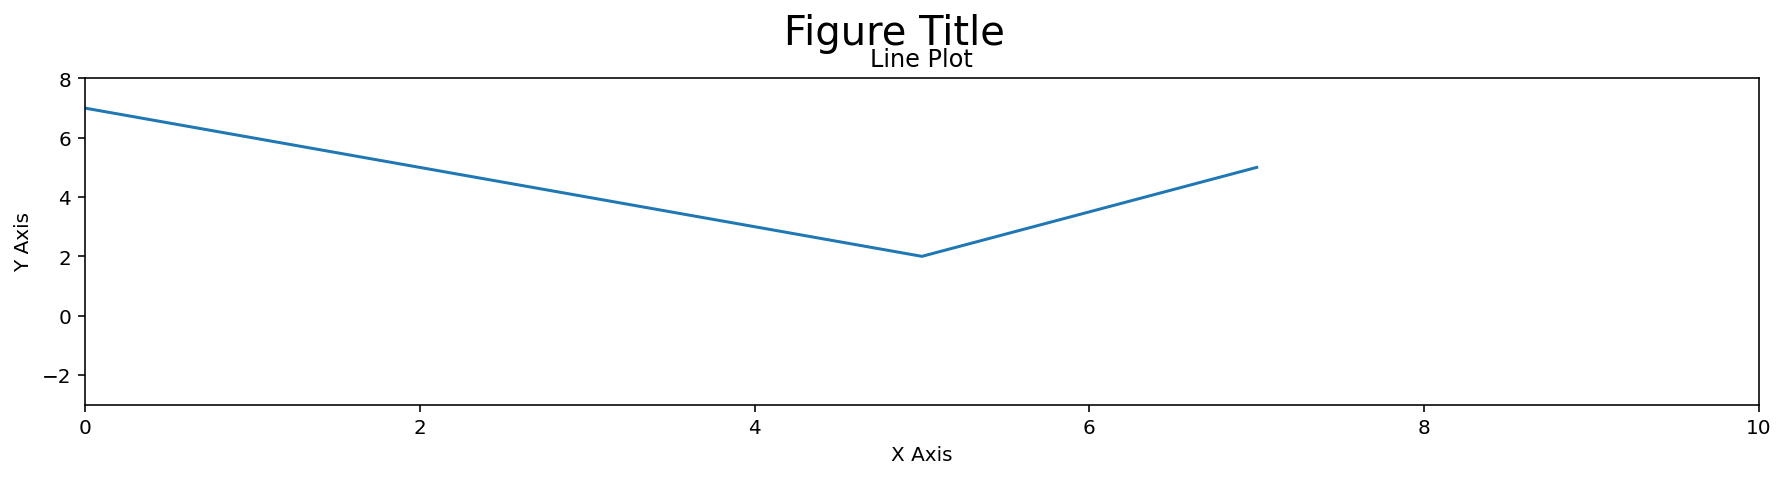

In [4]:
#Matlib 방식을 사용한 기본 도면

x = [-3, 5, 7]
y = [10, 2, 5]
fig = plt.figure(figsize = (15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size = 20, y = 1.03)
fig.savefig('c13-fig.png', dpi = 300, bbox_inches = 'tight')

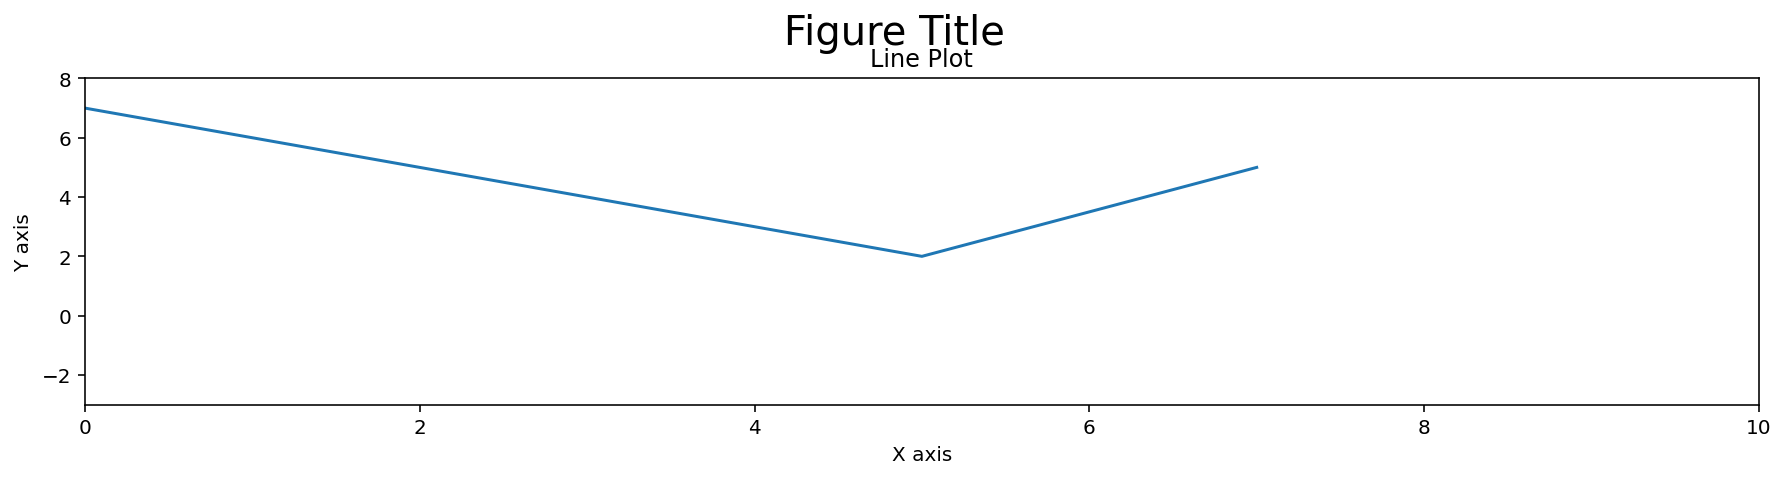

In [5]:
#객체 지향 접근 방식

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.core.display import display
fig = Figure(figsize = (15,3))
FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size = 20, y = 1.03)
display(fig)

Text(0.5, 1.03, 'Figure Title')

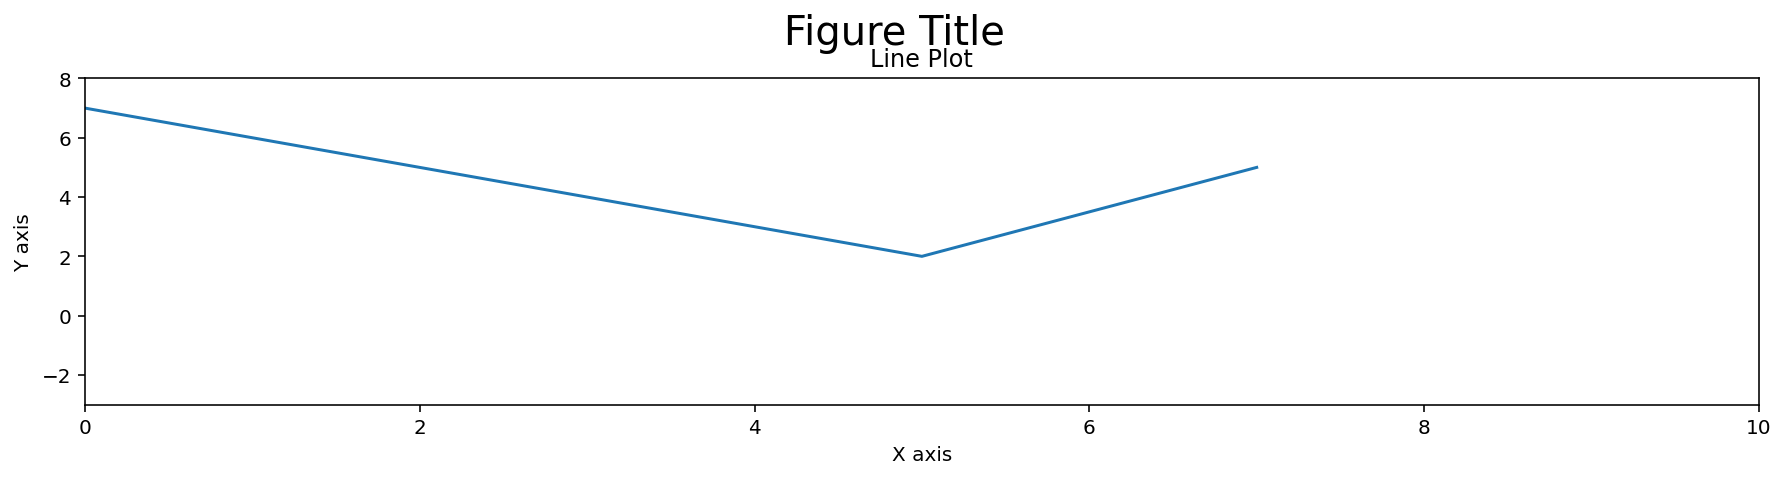

In [6]:
#두가지 접근 방식 모두 사용한 코드

fig, ax = plt.subplots(figsize = (15, 3))
ax.plot(x, y)
ax.set(xlim = (0, 10), ylim = (-3, 8),
      xlabel = 'X axis', ylabel = 'Y axis',
      title = 'Line Plot')
fig.suptitle('Figure Title', size = 20, y = 1.03)

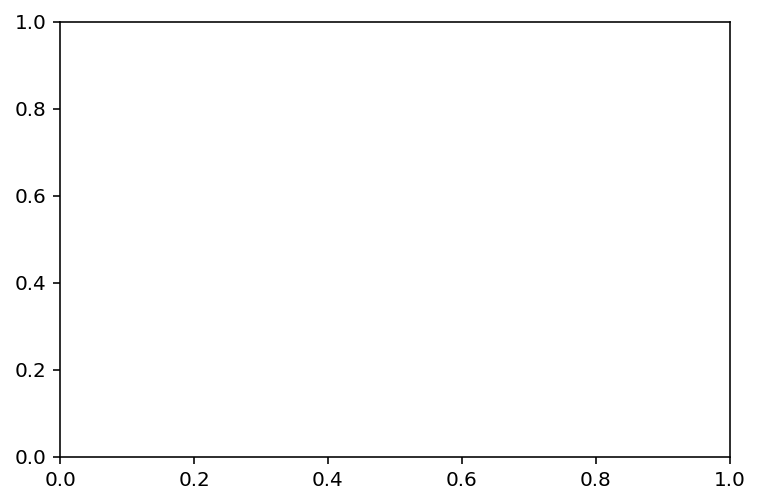

In [8]:
#객체 지향 방법을 사용하면 Figure와 하나 이상의 Axes 객체를 생성
#subplot을 사용해 단일 Axes를 가진 figure를 생성

fig, ax = plt.subplots(nrows = 1, ncols = 1)

In [9]:
type(fig)

matplotlib.figure.Figure

In [10]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [11]:
fig.get_size_inches()

array([6., 4.])

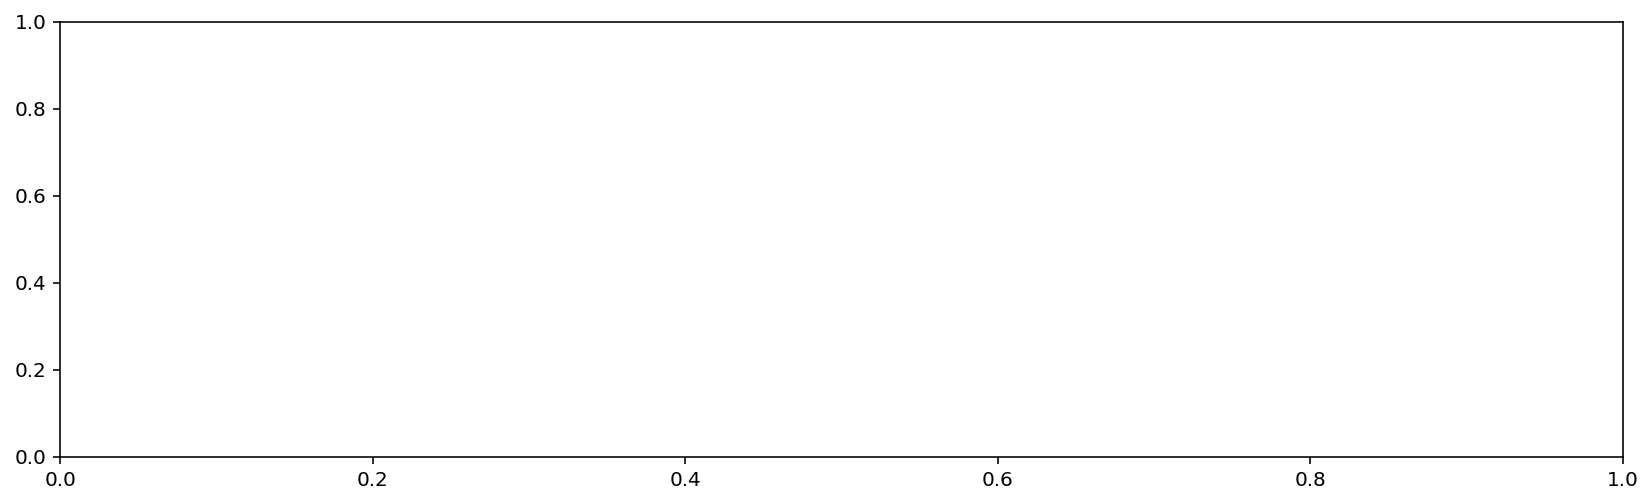

In [12]:
#figure 사이즈 변경
fig.set_size_inches(14, 4)
fig

In [13]:
#figure의 모든 axes를 모음
fig.axes

[<AxesSubplot:>]

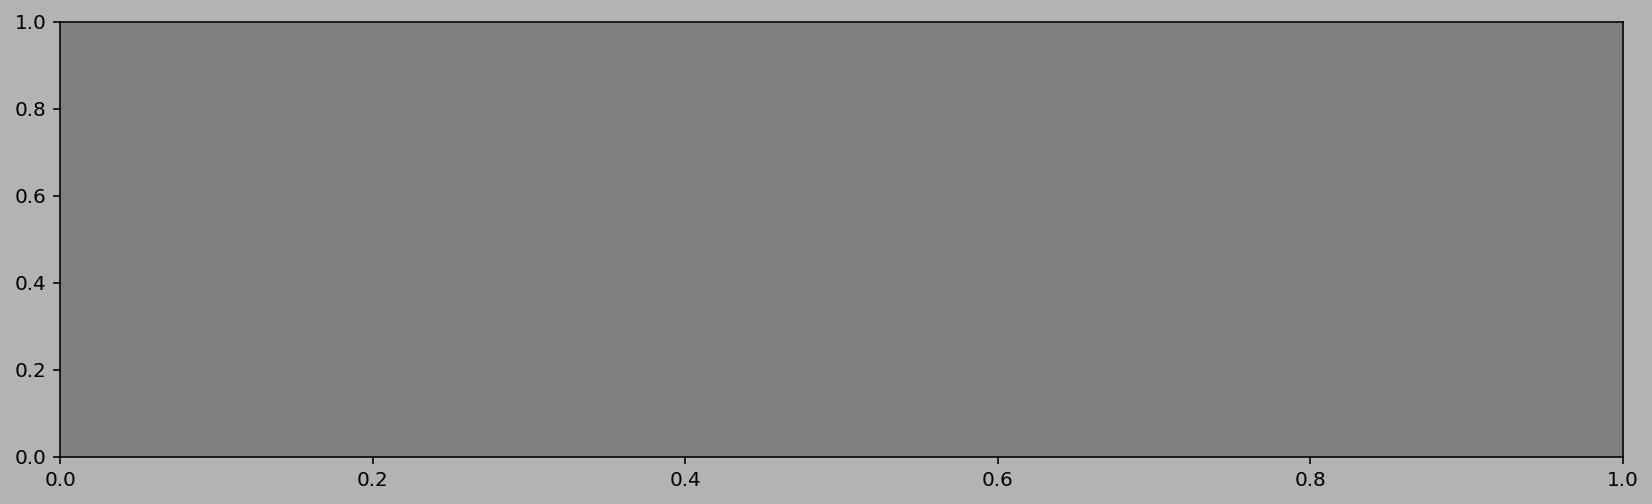

In [15]:
#Figure와 Axes를 구분하기 위해 각각에 고유한 색을 부여

fig.set_facecolor('.7')
ax.set_facecolor('.5')
fig

In [17]:
#.get_children 메서드를 사용하면 Axes의 직계 자손들을 볼 수 있음

ax_children = ax.get_children()
ax_children

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [25]:
#도면에는 4개의 스파인과 2개의 axis 객체가 있음.
#스파인이란 데이터의 경계를 나타내며 어두운 회색 사각형과 경계를 이루는 4개의 선을 의미
#.spines 속성을 사용하여 스파인에 액세스할 수 있음.

spines = ax.spines
spines

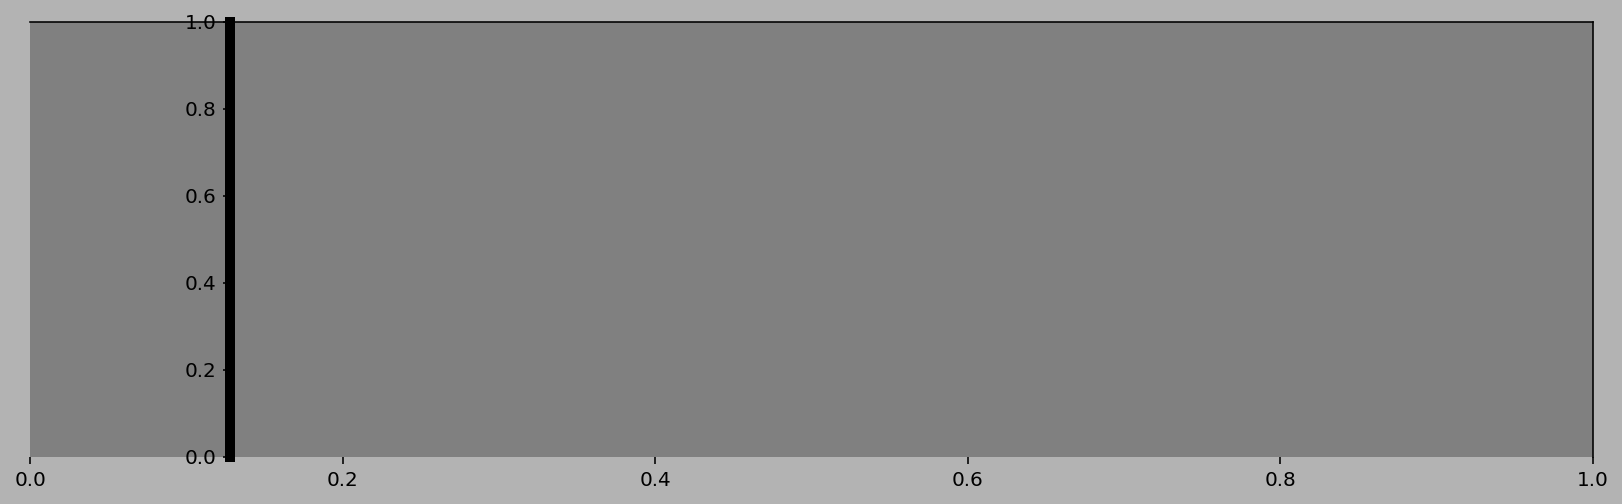

In [26]:
#스파인은 정렬된 딕셔너리에 들어가 있음.
#다음은 코드는 
#left 스파인을 선택하여 위치와 너비를 변경시켜 더 도드라지게 보이고 bottom 스파인은 보이지 않게 함

spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

findfont: Font family ['Gotham'] not found. Falling back to DejaVu Sans.


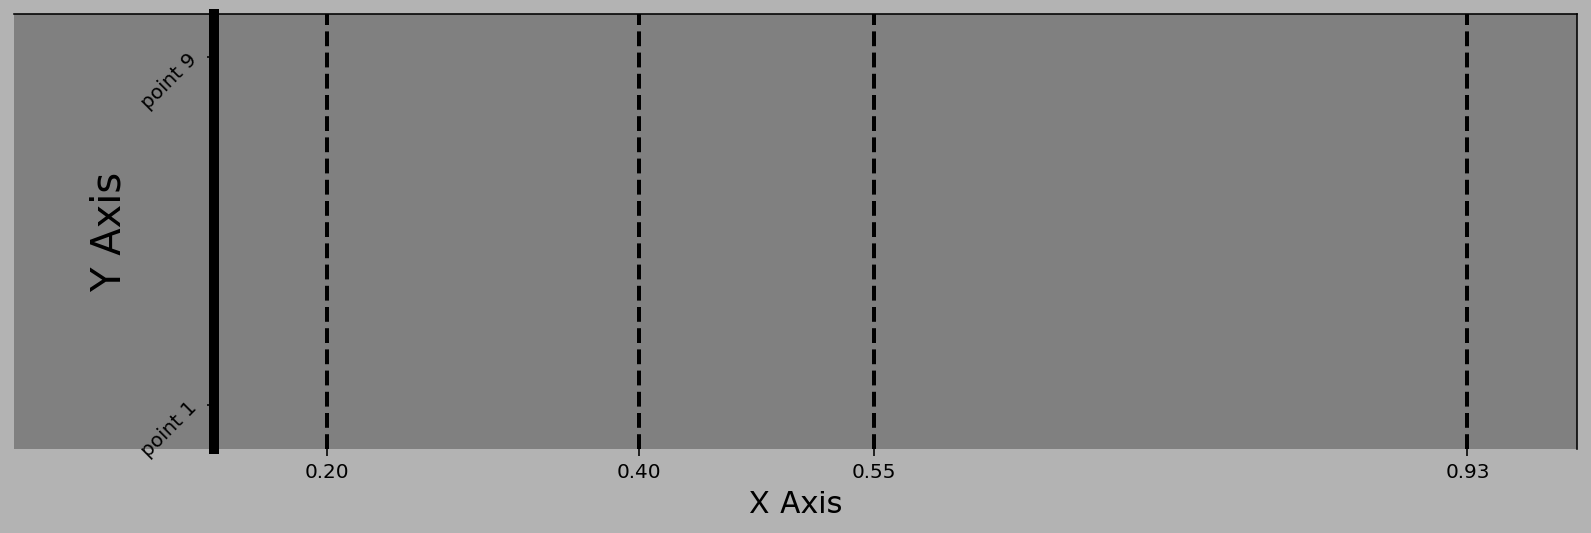

In [28]:
#axis 객체
#각 axis는 .xaxis와 .yaxis 속성을 사용하여 접근 가능.
#일부 속성은 Axes 객체에도 있음

ax.xaxis.grid(True, which = "major", linewidth = 2, color = "black", linestyle = "--")
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family = 'Verdana', fontsize = 15)
ax.set_ylabel('Y Axis', family = 'Gotham', fontsize = 20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation = 45)
fig

tuple

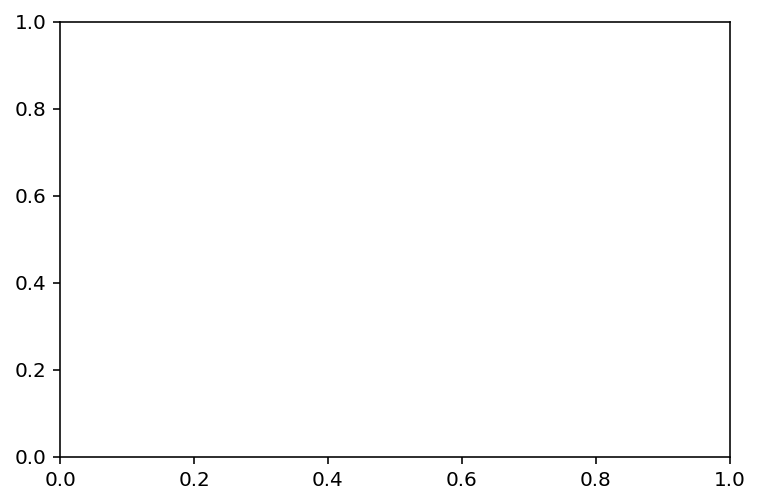

In [30]:
plot_objects = plt.subplots(nrows = 1, ncols = 1)
type(plot_objects)

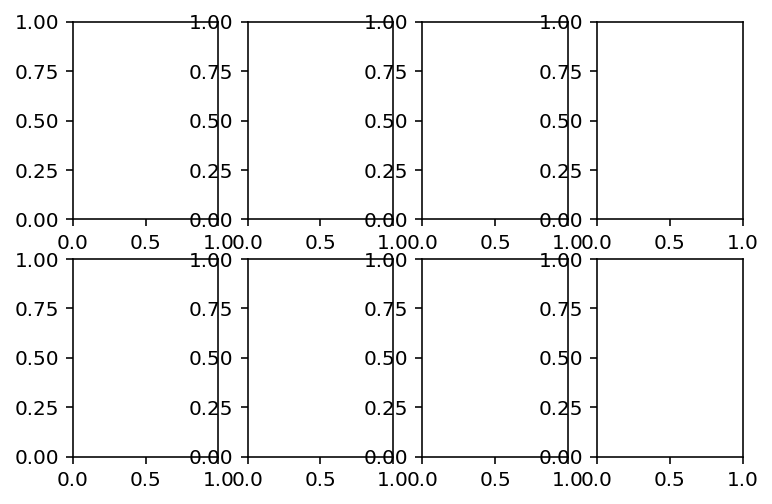

In [32]:
fig, axs = plt.subplots(2, 4)

In [33]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

### matplotlib으로 데이터 시각화

In [38]:
#유타 주의 알타 스키 리조트의 적설량 데이터를 읽고
#각 시즌에 얼마만큼의 눈이 왔는지 시각화

import pandas as pd
import numpy as np

alta = pd.read_csv('C:\\project\\python-workspace\\pandas_cookbook\\13장 matplotlib, pandas, seaborn을 이용한 시각화\\alta-noaa-1980-2019.csv')
alta

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-03,NaN,NaN,NaN,NaN,...,0.0,74.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
14156,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-04,NaN,NaN,NaN,NaN,...,0.0,77.0,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
14157,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-05,NaN,NaN,NaN,NaN,...,0.0,76.0,54.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
14158,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-06,NaN,NaN,NaN,NaN,...,0.0,66.0,52.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data = (alta
       .assign(DATE = pd.to_datetime(alta.DATE))
       .set_index('DATE')
       .loc['2018-09':'2019-08']
       .SNWD
       )
type(data)

pandas.core.series.Series

In [40]:
alta.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
count,1.416000e+04,1.416000e+04,1.416000e+04,25.000000,5.0,68.000000,27.000000,13830.000000,13795.000000,12912.000000,13914.000000,13857.000000,13641.000000,85.0,226.0,20.0,49.0,3.0,21.0
mean,4.059050e+01,-1.116369e+02,2.660900e+03,3.320000,2.0,0.565147,7.175185,0.145497,1.396491,35.032373,48.178310,29.451541,40.615351,1.0,1.0,1.0,1.0,1.0,1.0
std,1.193754e-12,2.572256e-11,7.094309e-10,5.800287,0.0,0.596939,8.053246,0.338183,3.591152,39.597673,17.843552,15.213539,18.792061,0.0,0.0,0.0,0.0,0.0,0.0
min,4.059050e+01,-1.116369e+02,2.660900e+03,2.000000,2.0,0.010000,0.120000,0.000000,0.000000,0.000000,-18.000000,-25.000000,-18.000000,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.059050e+01,-1.116369e+02,2.660900e+03,2.000000,2.0,0.107500,2.010000,0.000000,0.000000,0.000000,34.000000,18.000000,26.000000,1.0,1.0,1.0,1.0,1.0,1.0
50%,4.059050e+01,-1.116369e+02,2.660900e+03,2.000000,2.0,0.350000,5.000000,0.000000,0.000000,19.000000,47.000000,29.000000,39.000000,1.0,1.0,1.0,1.0,1.0,1.0
75%,4.059050e+01,-1.116369e+02,2.660900e+03,2.000000,2.0,0.785000,7.990000,0.120000,0.000000,66.000000,64.000000,42.000000,56.000000,1.0,1.0,1.0,1.0,1.0,1.0
max,4.059050e+01,-1.116369e+02,2.660900e+03,31.000000,2.0,2.650000,37.010000,5.000000,38.000000,168.000000,86.000000,72.000000,113.000000,1.0,1.0,1.0,1.0,1.0,1.0


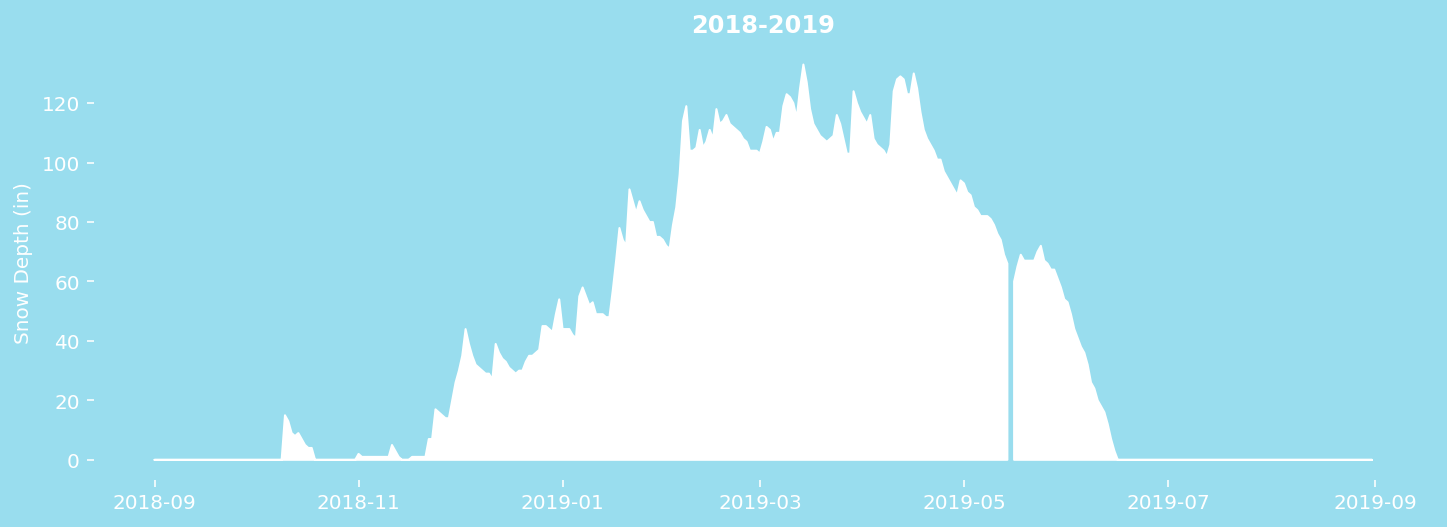

In [41]:
blue = '#99ddee'
white = '#ffffff'
fig, ax = plt.subplots(figsize = (12, 4), linewidth = 5, facecolor = blue)
ax.set_facecolor(blue)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis = 'x', colors = white)
ax.tick_params(axis = 'y', colors = white)
ax.set_ylabel('Snow Depth (in)', color = white)
ax.set_title('2018-2019', color = white, fontweight = 'bold')
ax.fill_between(data.index, data, color = white)
fig.savefig('c13-alta.png', dpi = 300, facecolor = blue)

In [44]:
#단일 figure에는 임의의 개수의 도면이 들어갈 수 있음.

import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

def plot_year(ax, data, years) :
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis = 'x', colors = white)
    ax.tick_params(axis = 'y', colors = white)
    ax.set_ylabel('Snow Depth (in)', color = white)
    ax.set_title(years, color = white, fontweight = 'bold')
    ax.fill_between(data.index, data, color = white)

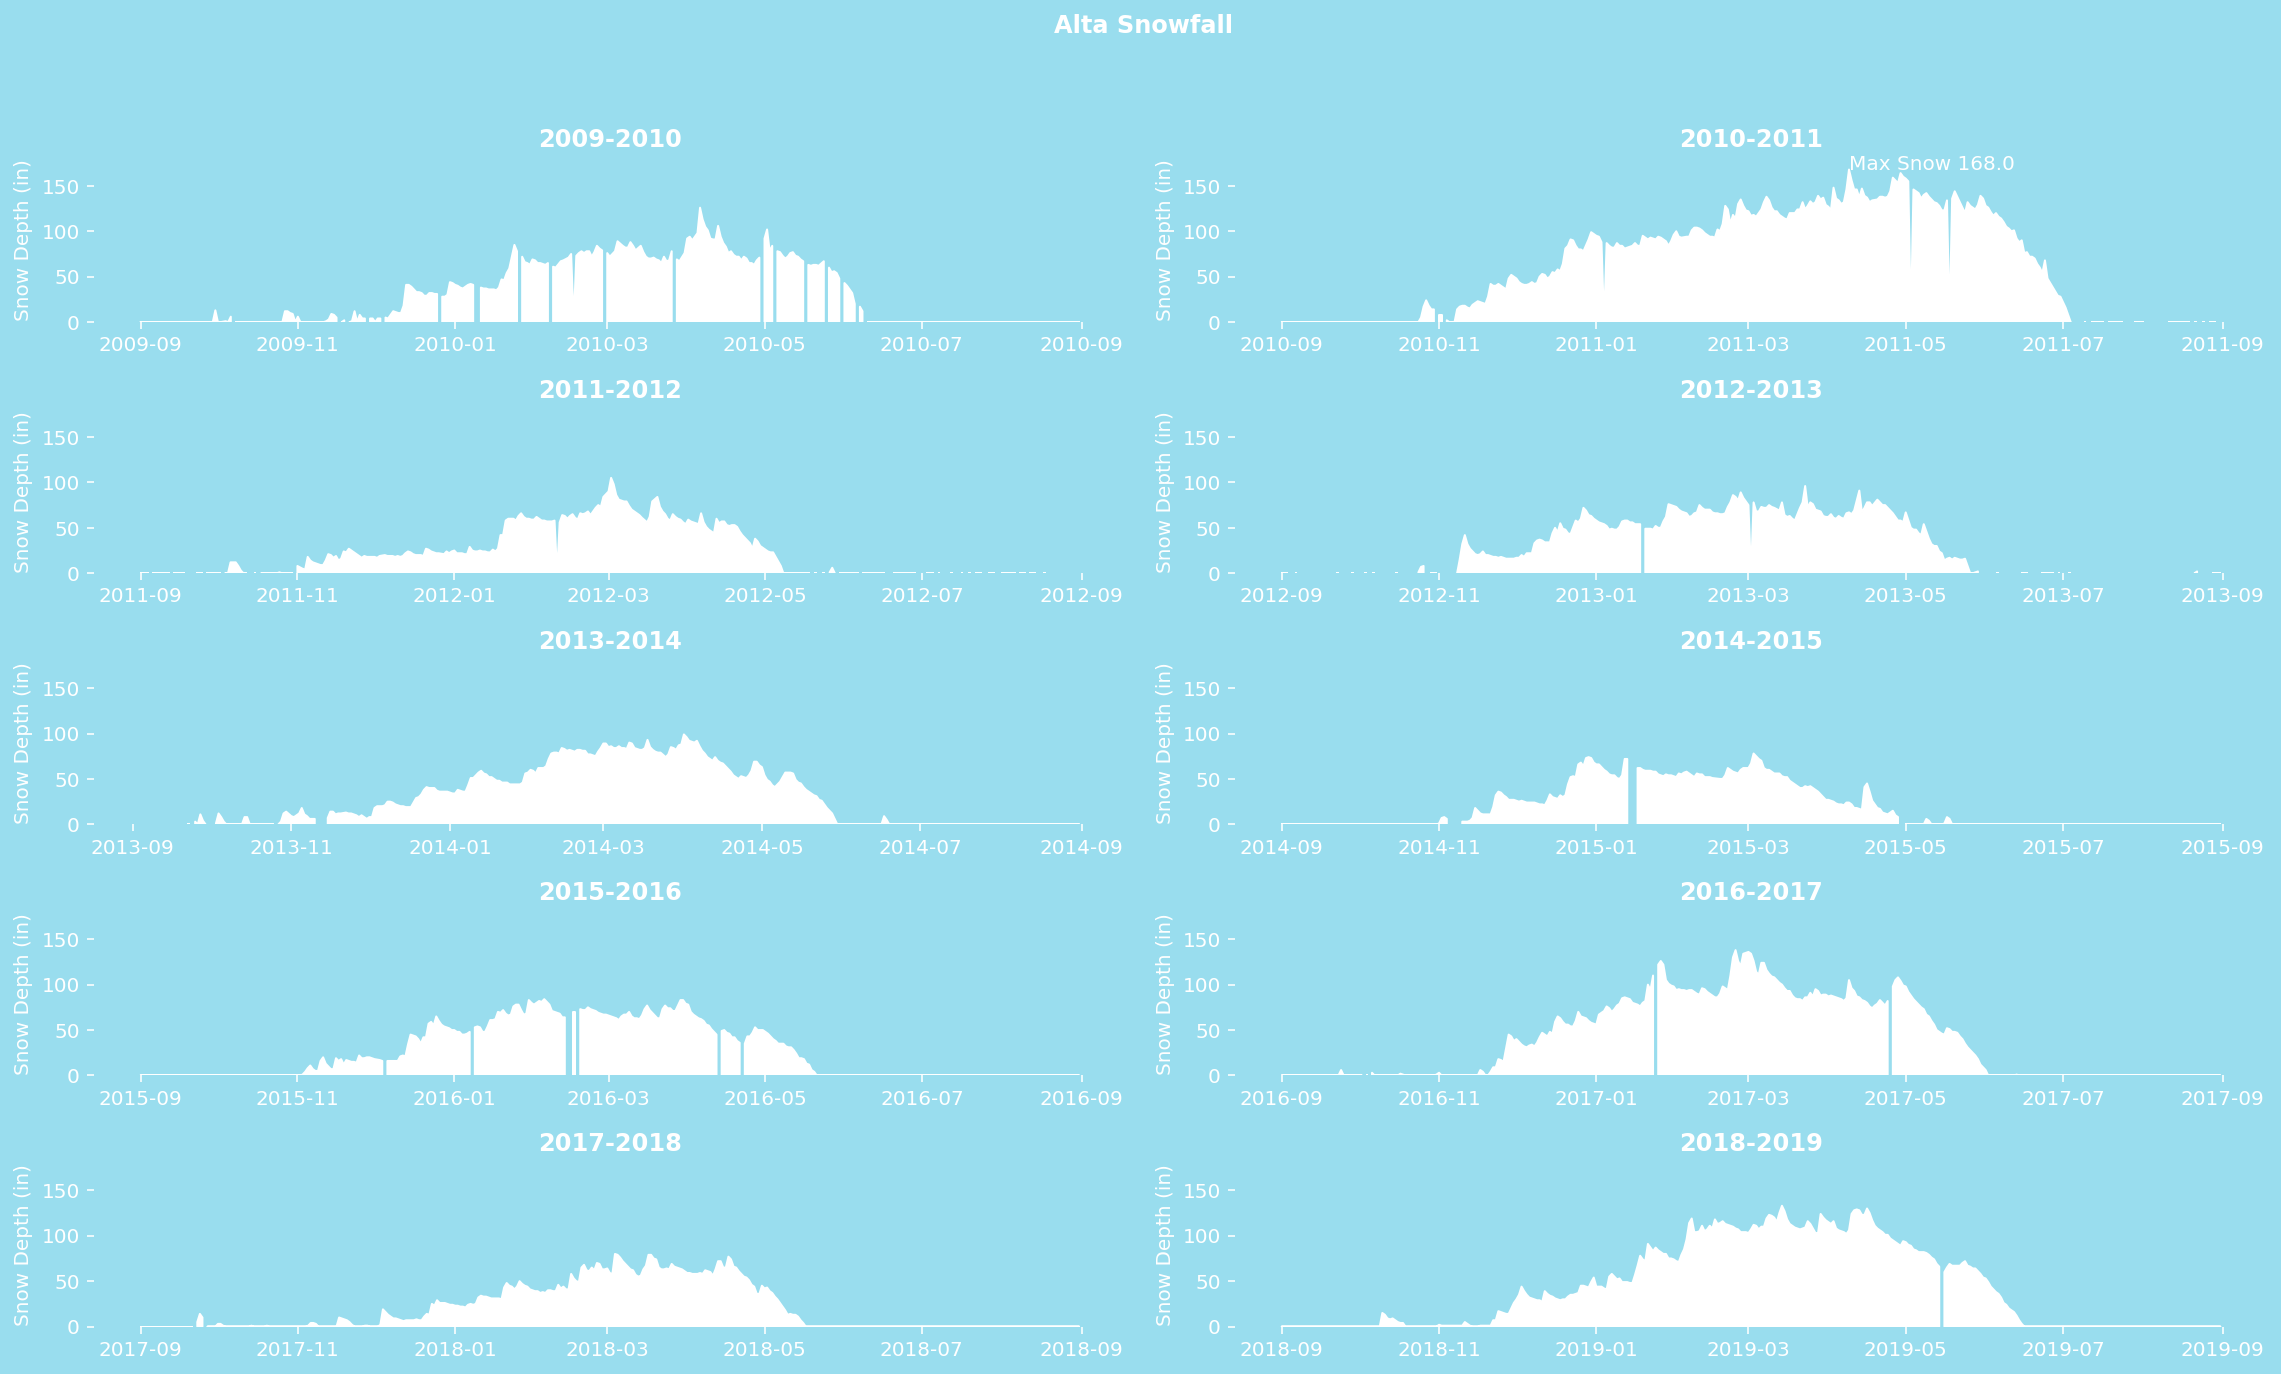

In [50]:
years = range(2009, 2019)

fig, axs = plt.subplots(ncols = 2, nrows = int(len(years)/2),
                        figsize = (16, 10), linewidth = 5, facecolor = blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None

for i,y in enumerate(years):
    ax = axs[i]
    data = (alta
           .assign(DATE = pd.to_datetime(alta.DATE))
        .set_index('DATE')
        .loc[f'{y}-09': f'{y + 1}-08']
        .SNWD
    )

    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)

max_ax.annotate(f'Max Snow {max_val}',
               xy = (mdt.date2num(max_data.idxmax()), max_val),
               color = white)

fig.suptitle('Alta Snowfall', color = white, fontweight = 'bold')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])
fig.savefig('c13-alta3.png', dpi = 300, facecolor = blue)

Text(15073.0, 168.0, 'Max Snow 168.0')

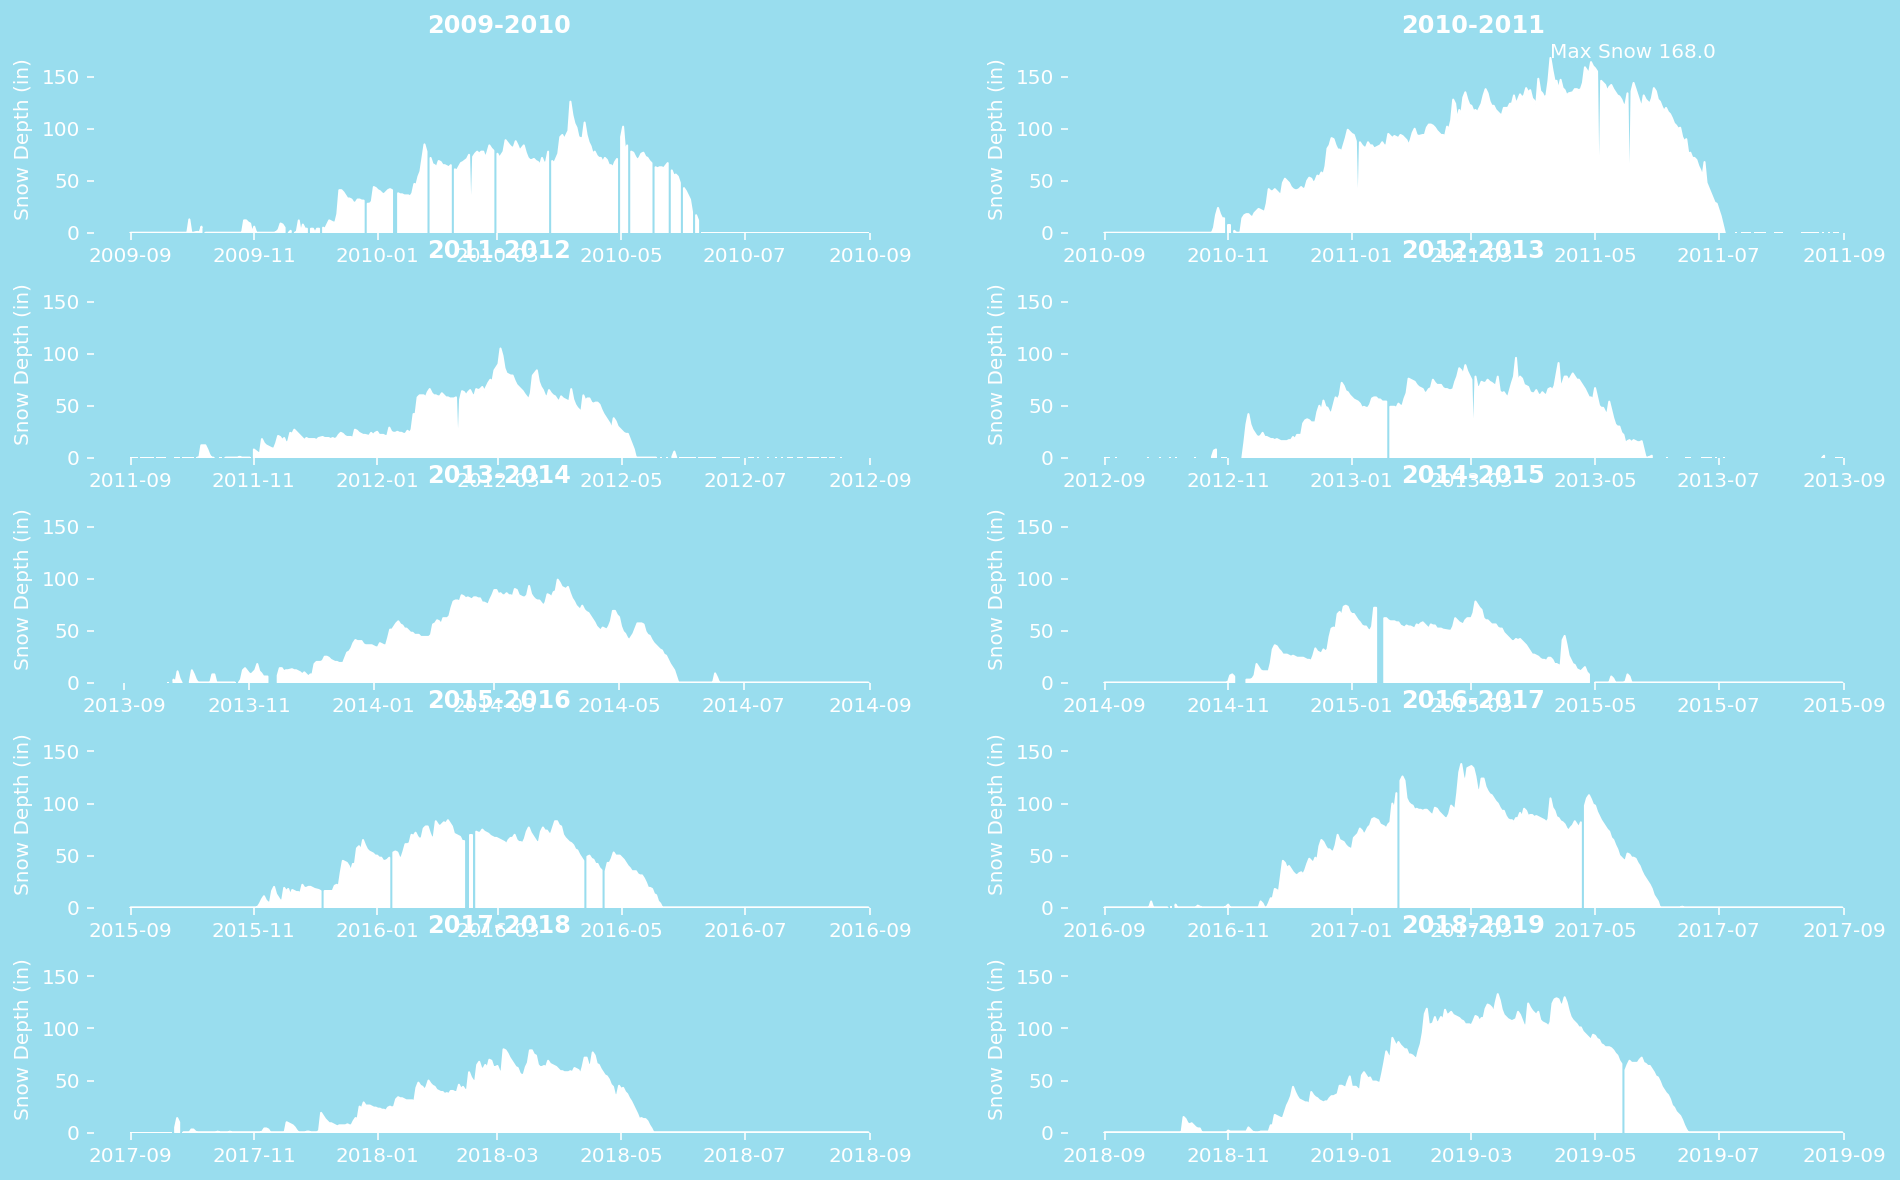

In [48]:
years = range(2009, 2019)
fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2), 
    figsize=(16, 10), linewidth=5, facecolor=blue)
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i,y in enumerate(years):
    ax = axs[i]
    data = (alta
       .assign(DATE=pd.to_datetime(alta.DATE))
       .set_index('DATE')
       .loc[f'{y}-09':f'{y+1}-08']
       .SNWD
    )
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
max_ax.annotate(f'Max Snow {max_val}', 
   xy=(mdt.date2num(max_data.idxmax()), max_val), 
   color=white)

In [52]:
df = pd.DataFrame(index = ['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
                  data = {'Apples' : [20, 10, 40, 20, 50],
                          'Oranges':[35, 40, 25, 19, 33]})

In [53]:
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


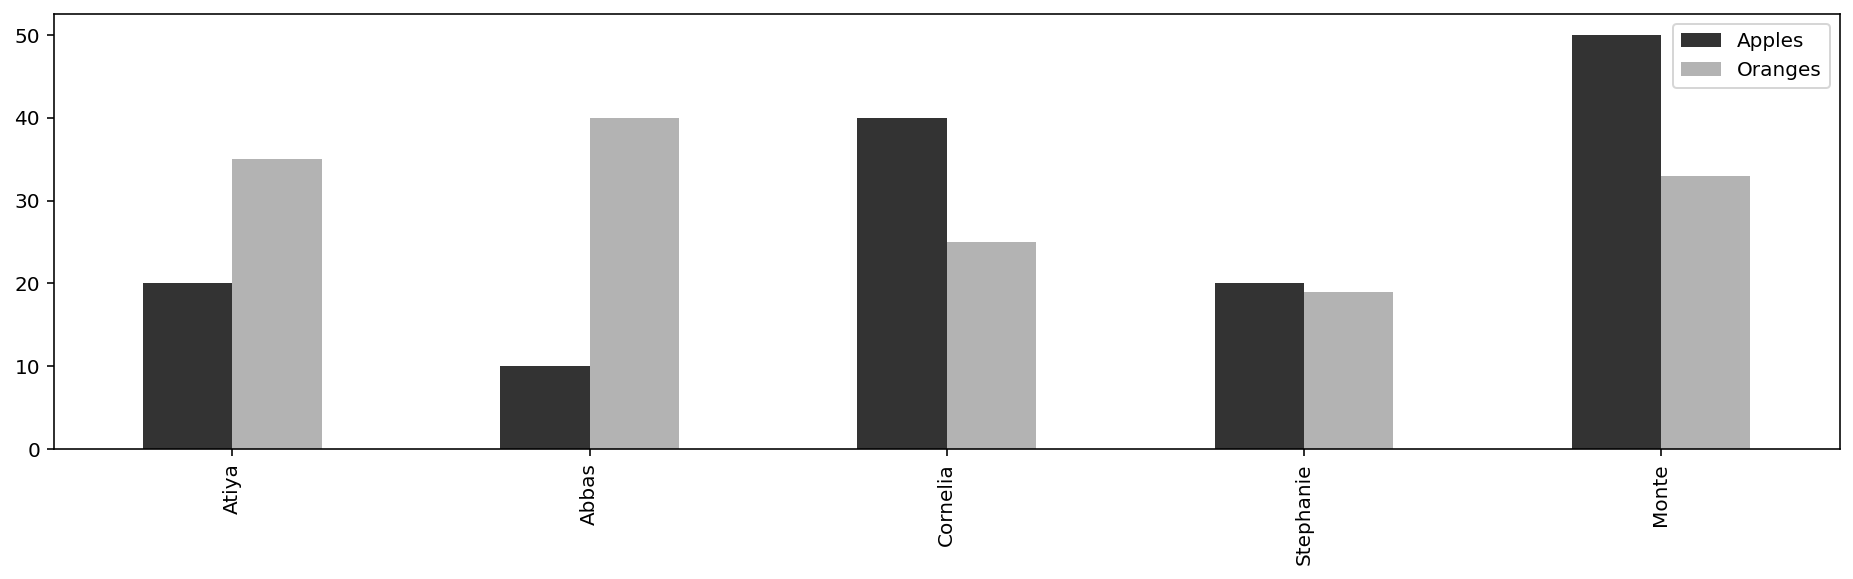

In [54]:
color = ['.2', '.7']
ax = df.plot.bar(color = color, figsize =(16,4))

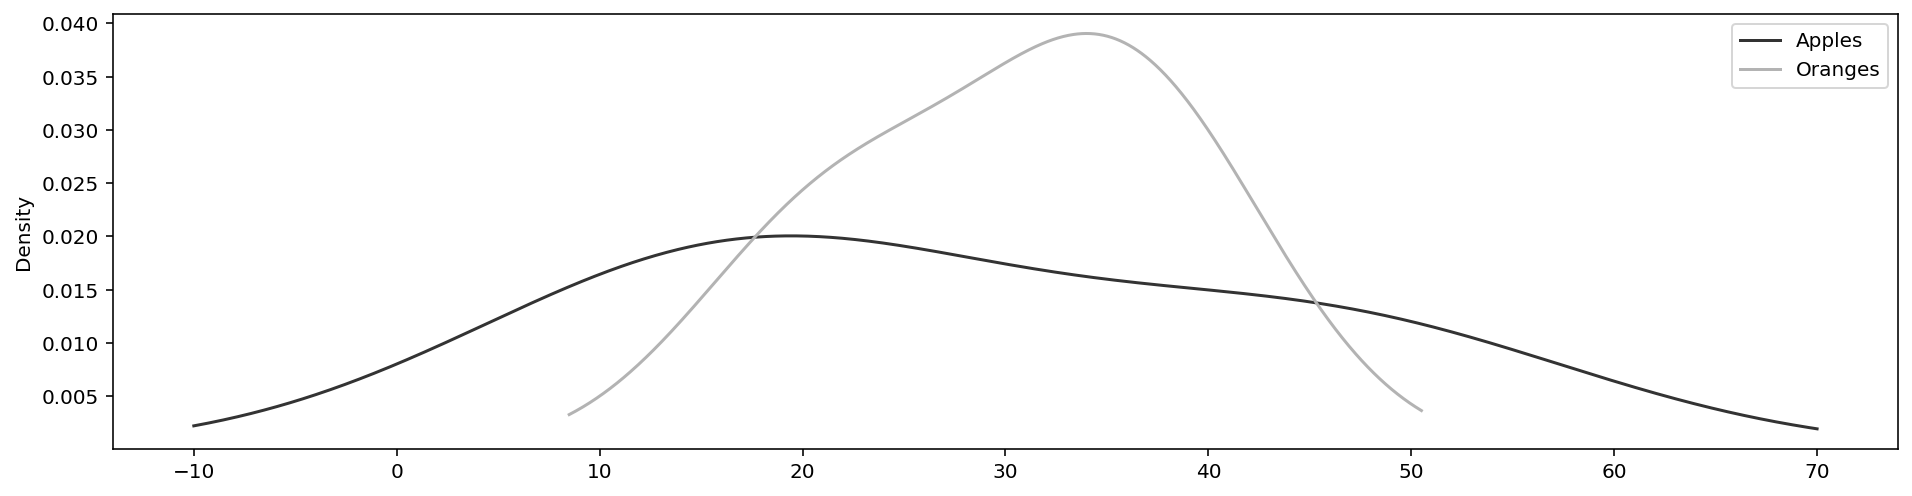

In [55]:
ax = df.plot.kde(color = color, figsize = (16,4))

In [5]:
flights = pd.read_csv('flights.csv')
flights

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


In [59]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
(flights
    .assign(DELAYED = flights['ARR_DELAY'].ge(15).astype(int), ON_TIME = lambda df_:1 - df_[cols].any(axis =1))
    .select_dtypes(int)
    .sum()
)

MONTH          363858
DAY            918447
WEEKDAY        229690
SCHED_DEP    81186009
DIST         51057671
SCHED_ARR    90627495
DIVERTED          137
CANCELLED         881
DELAYED         11685
ON_TIME         45789
dtype: int64

<AxesSubplot:title={'center':'Arrival Delay'}, ylabel='Frequency'>

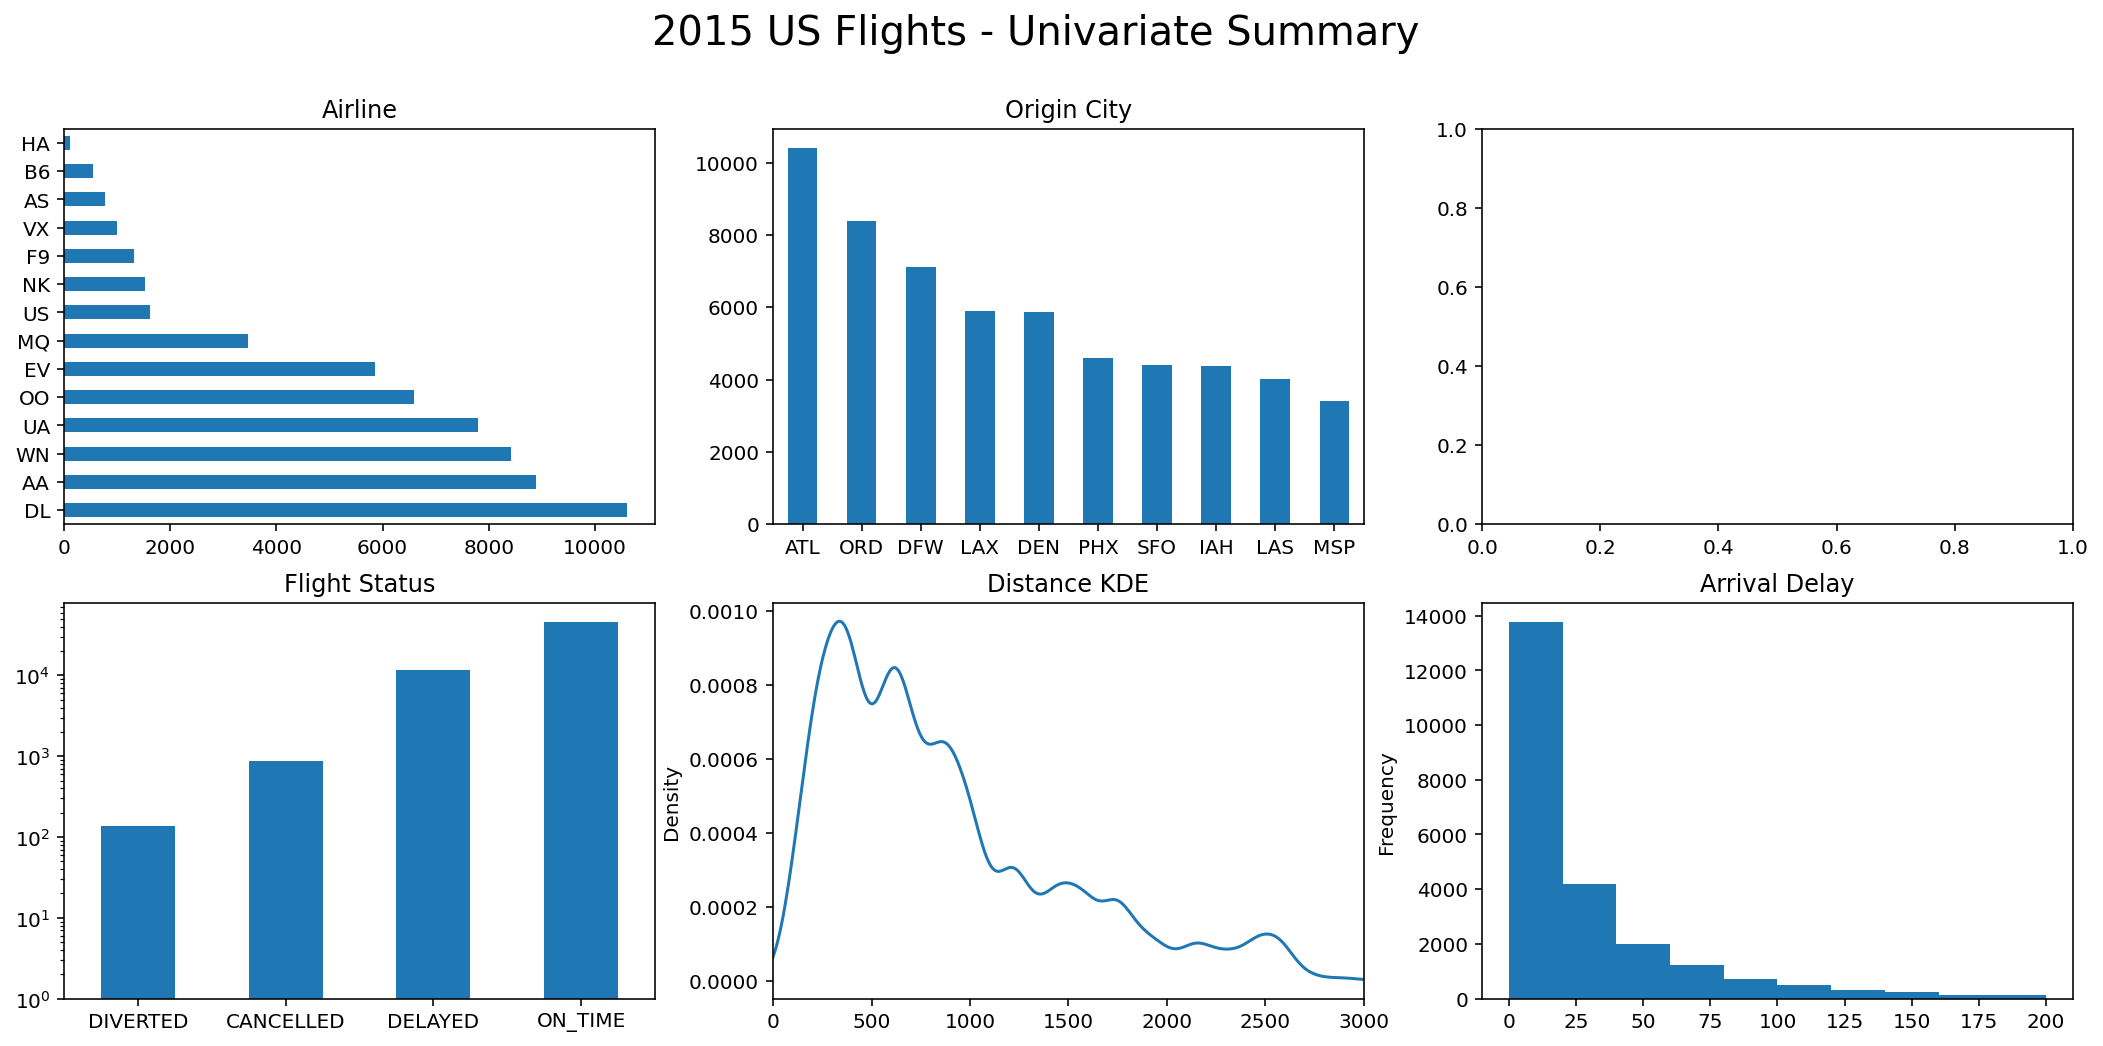

In [62]:
fig, ax_array = plt.subplots(2, 3, figsize = (18, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size = 20)
ac = flights['AIRLINE'].value_counts()
ac.plot.barh(ax = ax1, title = 'Airline')

(flights
    ['ORG_AIR']
    .value_counts()
    .plot.bar(ax = ax2, rot = 0, title = 'Origin City')
)

(flights
    .assign(DELAYED = flights['ARR_DELAY'].ge(15).astype(int),
           ON_TIME = lambda df_:1 - df_[cols].any(axis = 1))
    [['DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME']]
        .sum()
    .plot.bar(ax = ax4, rot = 0 , log = True, title = 'Flight Status')
)

flights['DIST'].plot.kde(ax = ax5, xlim = (0, 3000), title = 'Distance KDE')
flights['ARR_DELAY'].plot.hist(ax = ax6, title = 'Arrival Delay', range = (0, 200))

In [6]:
df_date = (flights
          [['MONTH', 'DAY']]
          .assign(YEAR = 2015,
                 HOUR = flights['SCHED_DEP'] // 100,
                 MINUTE = flights['SCHED_DEP'] % 100))
df_date

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20
...,...,...,...,...,...
58487,12,31,2015,5,15
58488,12,31,2015,19,10
58489,12,31,2015,18,46
58490,12,31,2015,5,25


In [8]:
flights_dep = pd.to_datetime(df_date)

In [9]:
flights_dep

0       2015-01-01 16:25:00
1       2015-01-01 08:23:00
2       2015-01-01 13:05:00
3       2015-01-01 15:55:00
4       2015-01-01 17:20:00
                ...        
58487   2015-12-31 05:15:00
58488   2015-12-31 19:10:00
58489   2015-12-31 18:46:00
58490   2015-12-31 05:25:00
58491   2015-12-31 08:59:00
Length: 58492, dtype: datetime64[ns]

<AxesSubplot:title={'center':'Flights per Week'}>

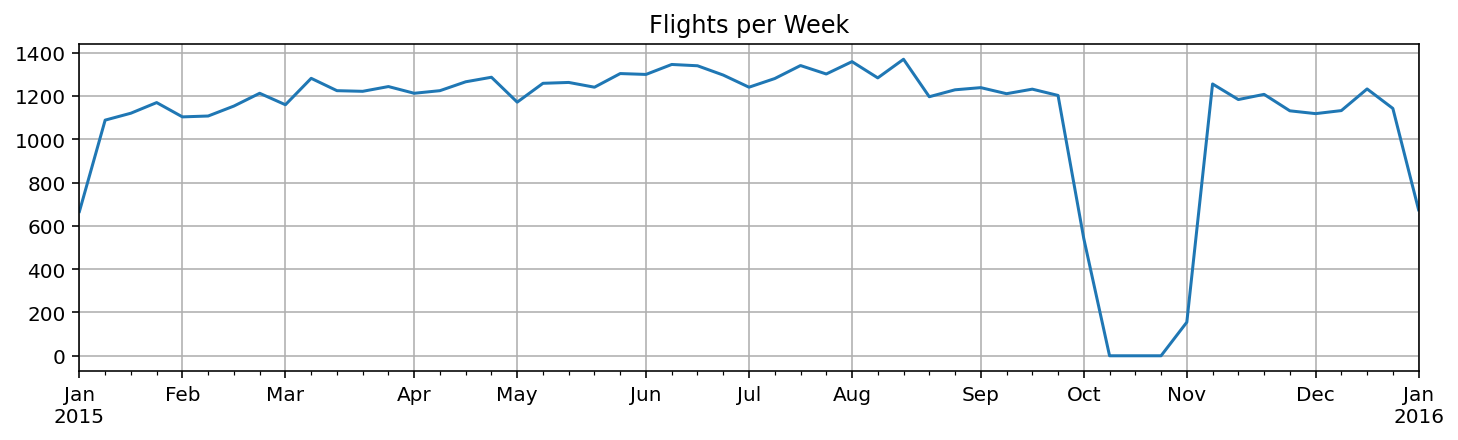

In [12]:
flights.index = flights_dep
fc = flights.resample('W').size()
fc.plot.line(figsize = (12, 3), title = 'Flights per Week', grid = True)

C:\Users\HJ\AppData\Local\Temp/ipykernel_31400/1438895378.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(xy = (.8, .55), xytext = (.8, .77),


Text(0.8, 0.77, 'missing data')

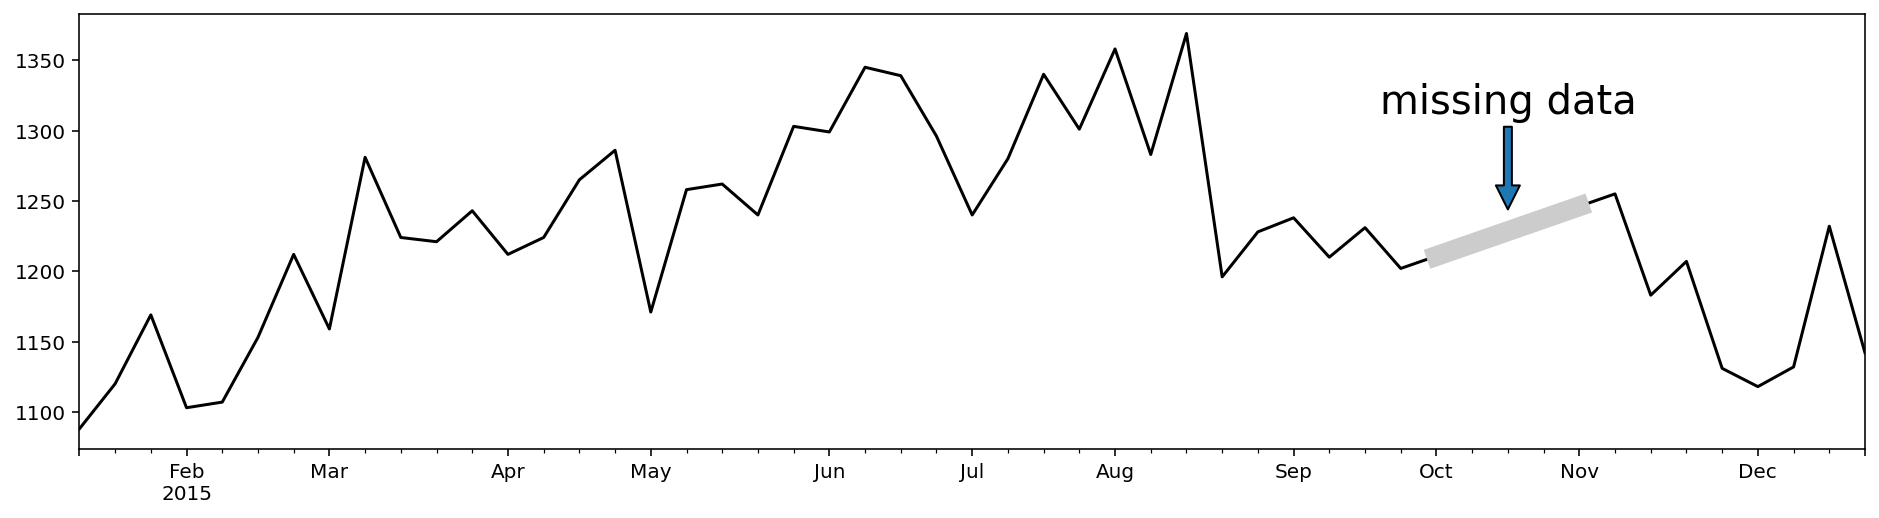

In [14]:
def interp_lt_n(df_, n = 600) : 
    return (df_
           .where(df_ > n)
           .interpolate(limit_direction = 'both')
           )

fig, ax = plt.subplots(figsize = (16, 4))

data = (flights
       .resample('W')
       .size()
       )

(data.pipe(interp_lt_n)
     .iloc[1:-1]
    .plot.line(color = 'black', ax = ax)
)

mask = data < 600

(data.pipe(interp_lt_n)
    [mask]
    .plot.line(color = '.8', linewidth = 10)
)

ax.annotate(xy = (.8, .55), xytext = (.8, .77),
           xycoords = 'axes fraction', s = 'missing data',
           ha = 'center', size = 20, arrowprops = dict())

<AxesSubplot:title={'center':'Average Distance per Destination'}, xlabel='DEST_AIR'>

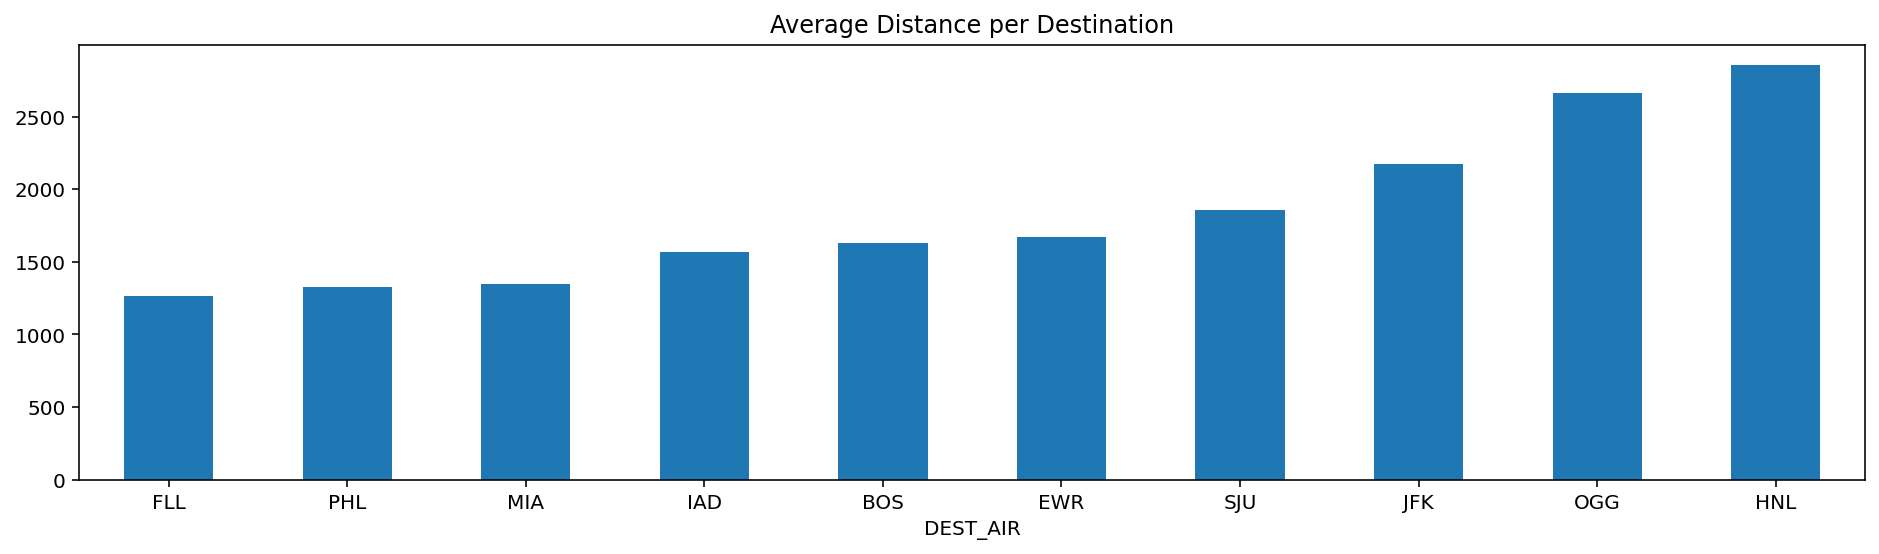

In [15]:
fig, ax = plt.subplots(figsize = (16, 4))
(flights
    .groupby('DEST_AIR')
    ['DIST']
    .agg(['mean', 'count'])
    .query('count > 100')
    .sort_values('mean')
    .tail(10)
    .plot.bar(y = 'mean', rot = 0, legend = False, ax = ax,
             title = 'Average Distance per Destination'))

<AxesSubplot:xlabel='DIST', ylabel='AIR_TIME'>

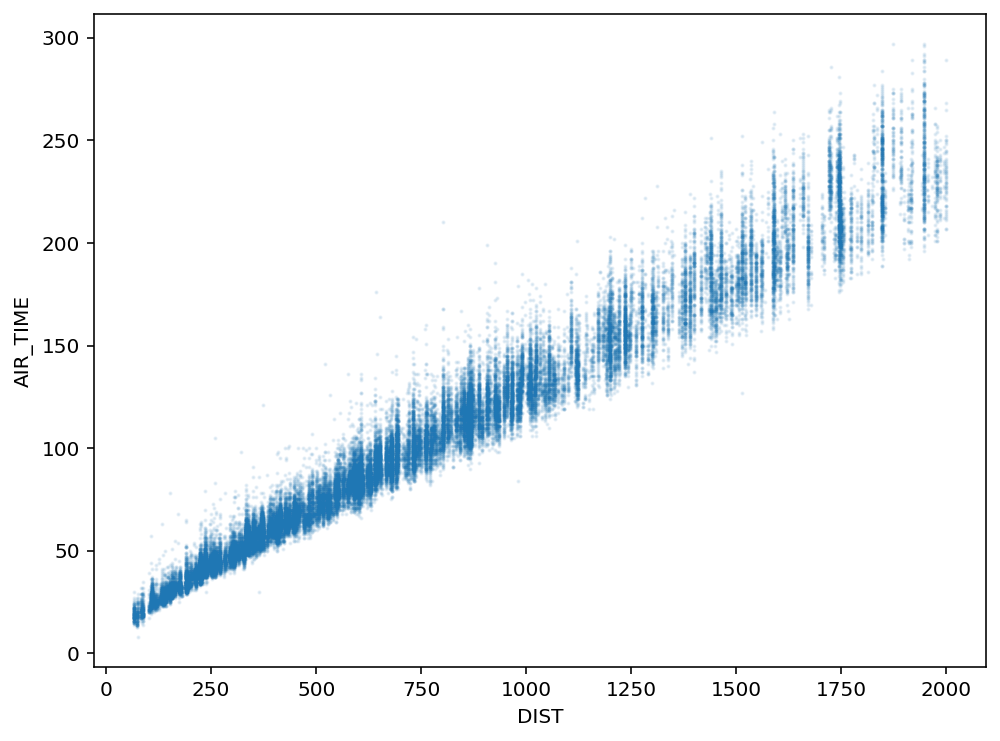

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
(flights
     .reset_index(drop = True)
     [['DIST', 'AIR_TIME']]
     .query('DIST <= 2000')
     .dropna()
     .plot.scatter(x = 'DIST', y = 'AIR_TIME', ax = ax, alpha = 0.1, s = 1)
)

In [17]:
flights[['DIST', 'AIR_TIME']].corr()

,DIST,AIR_TIME
DIST,1.00000,0.98774
AIR_TIME,0.98774,1.00000


In [18]:
zscore = lambda x: (x - x.mean()) / x.std()

short = (flights
        [['DIST', 'AIR_TIME']]
        .query('DIST <= 2000')
        .dropna()
        .reset_index(drop = True)
        .assign(BIN = lambda df_:pd.cut(df_.DIST, bins = range(0, 2001, 250)))
        )

scores = (short
         .groupby('BIN')
         ['AIR_TIME']
         .transform(zscore))

short.assign(SCORE = scores)

,DIST,AIR_TIME,BIN,SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999
...,...,...,...,...
53462,1464,166.0,"(1250, 1500]",-0.521999
53463,414,71.0,"(250, 500]",1.376879
53464,262,46.0,"(250, 500]",-1.255719
53465,907,124.0,"(750, 1000]",0.495005


<AxesSubplot:>

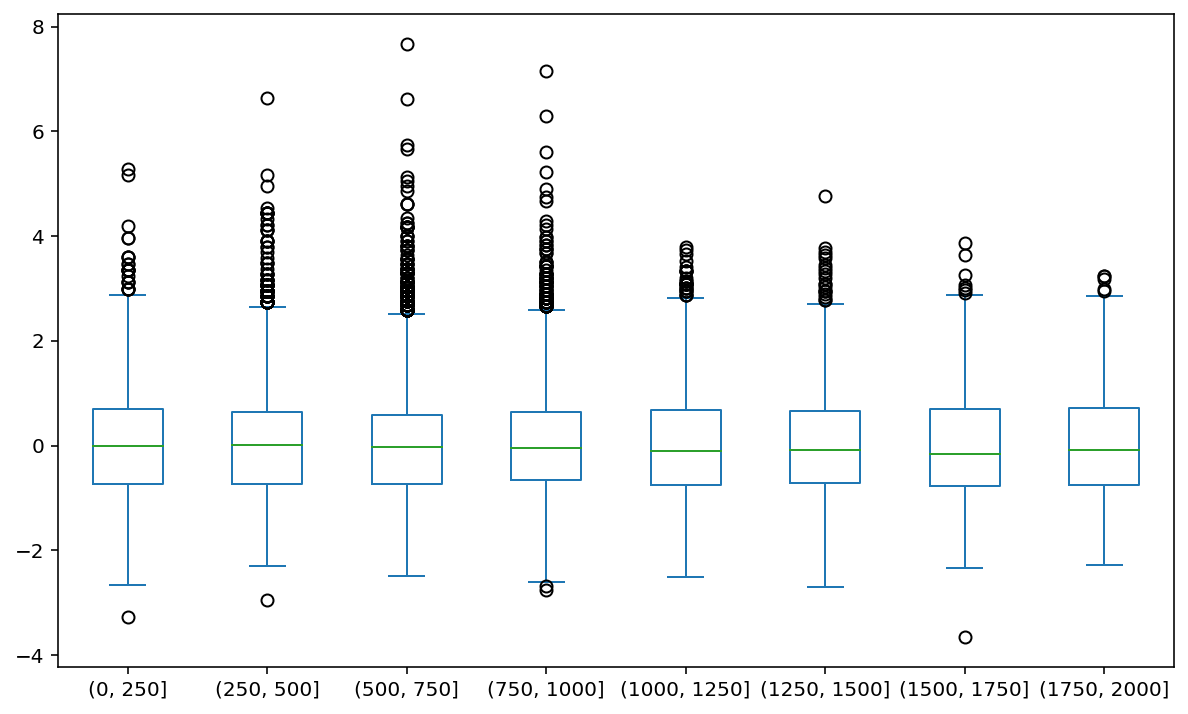

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))
(short.assign(SCORE = scores)
    .pivot(columns = 'BIN')
    ['SCORE']
    .plot.box(ax = ax)
)

In [21]:
mask = (short
       .assign(SCORE = scores)
       .pipe(lambda df_:df_.SCORE.abs() > 6)
       )

outliers = (flights
           [['DIST', 'AIR_TIME']]
           .query('DIST <= 2000')
           .dropna()
           .reset_index(drop = True)
           [mask]
           .assign(PLOT_NUM = lambda df_:range(1, len(df_)+1))
           )
outliers

,DIST,AIR_TIME,PLOT_NUM
14972,373,121.0,1
22507,907,199.0,2
40768,643,176.0,3
50141,651,164.0,4
52699,802,210.0,5


Text(0.5, 1.0, 'Flight Time vs Distance with Outliers')

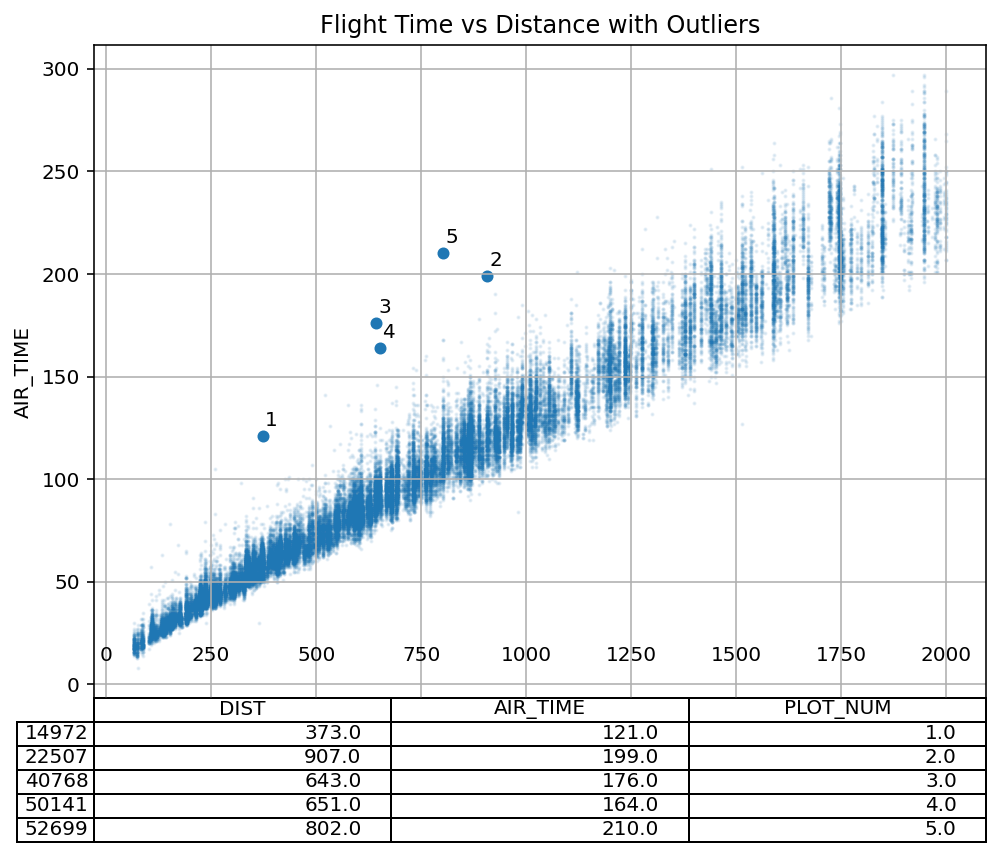

In [23]:
fig, ax = plt.subplots(figsize = (8, 6))

(short
    .assign(SCORE = scores)
    .plot.scatter(x = 'DIST', y = 'AIR_TIME',
                 alpha = .1, s = 1, ax = ax,
                 table = outliers)
)

outliers.plot.scatter(x = 'DIST', y = 'AIR_TIME',
                     s = 25, ax = ax, grid = True)

outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index = False):
    ax.text(d + 5, t + 5, str(n))

plt.setp(ax.get_xticklabels(), y = .1)
plt.setp(ax.get_xticklines(), visible = False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')